In [357]:
import numpy as np
import qutip as q
from qutip_qip.circuit import QubitCircuit
import qutip_qip.operations as qops
import qutip_qip.qubits as qubits
import qutip_qip as qip
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [359]:
qops.H(2)

Gate(H, targets=[2], controls=None, classical controls=None, control_value=None, classical_control_value=None)

In [361]:
qops.snot(2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]]

In [362]:
qip.operations.cz_gate(3,0,1)

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]

In [363]:
qops.CZ(0,1)

Gate(CZ, targets=[1], controls=[0], classical controls=None, control_value=1, classical_control_value=None)

In [364]:
g=qops.RZ(1,.3)
g.arg_value

0.3

In [365]:
qops.CRZ(0,1,arg_value=.3)

Gate(_OneControlledGate, targets=[1], controls=[0], classical controls=None, control_value=1, classical_control_value=None)

In [366]:
c = QubitCircuit(1, reverse_states=False)
c.add_gate(qops.H(0))
c.compute_unitary()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [367]:
c = QubitCircuit(2, reverse_states=False)
c.add_gate(qops.H(0))
c.add_gate(qops.CPHASE(1, 0, arg_value=np.pi/2))
c.add_gate(qops.H(1))
c.add_gate(qops.SWAP([0,1]))
c.compute_unitary()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j   0. -0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5+0.j  -0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5+0.j   0. +0.5j]]

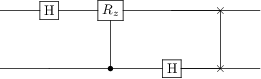

In [368]:
c.png

In [369]:
c = QubitCircuit(3, reverse_states=False)
c.add_gate(qops.H(0))
c.add_gate(qops.CPHASE(1, 0, arg_value=np.pi/2))
c.add_gate(qops.CPHASE(2, 0, arg_value=np.pi/4))
c.add_gate(qops.H(1))
c.add_gate(qops.CPHASE(2, 1, arg_value=np.pi/2))
c.add_gate(qops.H(2))
c.add_gate(qops.SWAP([0,2]))

c.compute_unitary()

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.35355339+0.j          0.25      +0.25j        0.        +0.35355339j
  -0.25      +0.25j       -0.35355339+0.j         -0.25      -0.25j
   0.        -0.35355339j  0.25      -0.25j      ]
 [ 0.35355339+0.j          0.        +0.35355339j -0.35355339+0.j
   0.        -0.35355339j  0.35355339+0.j          0.        +0.35355339j
  -0.35355339+0.j          0.        -0.35355339j]
 [ 0.35355339+0.j         -0.25      +0.25j        0.        -0.35355339j
   0.25      +0.25j       -0.35355339+0.j          0.25      -0.25j
   0.        +0.35355339j -0.25      -0.25j      ]
 [ 0.35355339+0.j         -0.35355339+0.j          0.35355339+0.j
  -0.35355339+0.j          0.35355339+0.j         -0.35355339+0.j


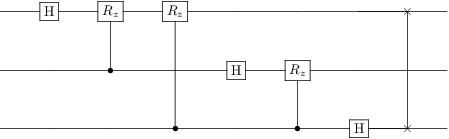

In [370]:
c.png

In [375]:
ini_state = qubits.qubit_states(3, [0,0,0])
out = c.run(ini_state)
out

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]

In [372]:
basis = [qubits.qubit_states(3, list(map(int, bin(i)[2:]))) for i in range(8)] 

In [373]:
ini_state2 = (basis[0] + basis[4]).unit()
c.run(ini_state2)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.5]
 [0. ]
 [0.5]
 [0. ]
 [0.5]
 [0. ]
 [0.5]
 [0. ]]

In [374]:
ini_state2

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]

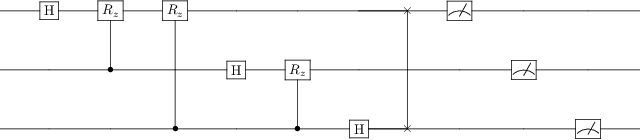

In [376]:
c.add_measurement('m0', 0)
c.add_measurement('m1', 1)
c.add_measurement('m2', 2)
c.png

In [379]:
out = c.run_statistics(ini_state2)

In [380]:
out.final_states

[Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]]]

In [377]:
c.run_statistics(ini_state2).probabilities

[0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999,
 0.2499999999999999]

In [ ]:
c.run

### Harmonic oscillator (bosonic modes)

In [382]:
N = 10
a, ad = q.destroy(N), q.create(N)
x, p = q.position(N), q.momentum(N)

s0 = q.basis(N, 0)
ad * s0

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]

In [384]:
out = (ad**2 * s0).unit()
out

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [387]:
q.coherent(N, 1)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888194]
 [0.24761511]
 [0.12380753]
 [0.0553686 ]
 [0.02260303]
 [0.00854887]
 [0.00299672]
 [0.00110007]]

In [388]:
a * q.coherent(N, 1)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.60653066]
 [0.60653066]
 [0.42888195]
 [0.24761505]
 [0.12380794]
 [0.05536588]
 [0.02261818]
 [0.00847601]
 [0.00330022]
 [0.        ]]

In [389]:
ad * q.coherent(N, 1)

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.60653066]
 [0.85776388]
 [0.74284531]
 [0.49523022]
 [0.27684205]
 [0.13562481]
 [0.05980198]
 [0.02417986]
 [0.00899017]]

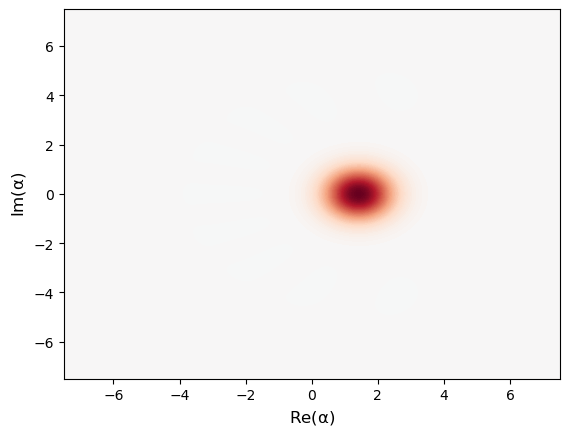

In [391]:
state = (q.coherent(N, 1)).unit()
q.plot_wigner(state, projection='2d', cmap=colormaps['RdBu_r']);

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

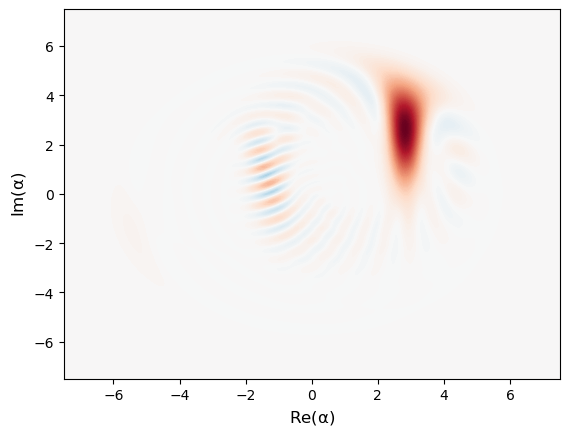

In [396]:
N = 10
N = 20
s0 = q.basis(N)
sqz = q.squeeze(N, .8) * s0
D = q.displace(N, 2+2j)
q.plot_wigner(D * sqz, cmap=colormaps['RdBu_r'])

#### Multimode system

In [397]:
N = 3
a, ad = q.destroy(N), q.create(N)
ada = q.tensor(ad, a)
aad = q.tensor(a, ad)
BS = lambda theta: (theta * (ada - aad)).expm()

In [398]:
BS(np.pi/4)

Quantum object: dims=[[3, 3], [3, 3]], shape=(9, 9), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00 -7.07106781e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.00000000e-01  0.00000000e+00
  -7.07106781e-01  0.00000000e+00  5.00000000e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  7.07106781e-01  0.00000000e+00  7.07106781e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.07106781e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.50401187e-16  0.00000000e+00 -1.00000000e+00
   0.0000

In [399]:
in_state = q.tensor(q.basis(N,1), q.basis(N,1))
out_state = BS(np.pi/4) * in_state
out_state

Quantum object: dims=[[3, 3], [1, 1]], shape=(9, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]]

#### Dynamic evolution

In [414]:
N = 30
om = 1
H = om * q.num(N)
rho0 = q.coherent(N, 2.0)
tlist = np.linspace(0, 6*np.pi,100)
sim_out = q.mesolve(H, rho0, tlist, c_ops=[.5*q.destroy(N)]) 

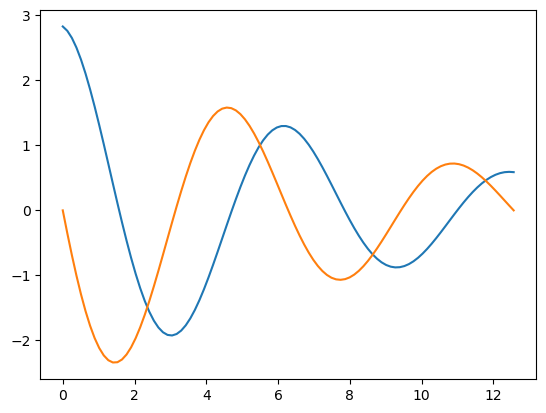

In [415]:
xvals = [q.expect(q.position(N), s) for s in sim_out.states]
pvals = [q.expect(q.momentum(N), s) for s in sim_out.states]
plt.plot(tlist, xvals)
plt.plot(tlist, pvals)

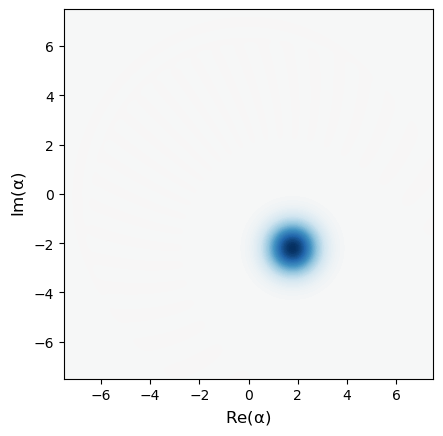

In [405]:
fig, ax = q.plot_wigner(sim_out.states[7], projection='2d')
ax.set_aspect(1)

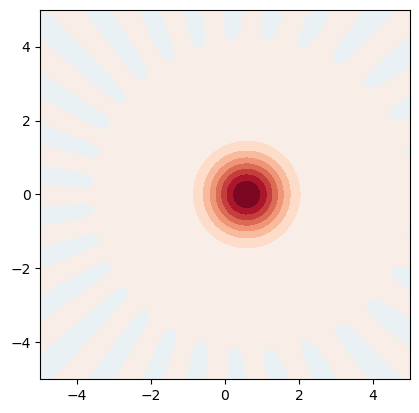

In [416]:
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
xvec = np.linspace(-5,5,100)
ims = []
fig, ax = plt.subplots()
ax.set_aspect(1)
for s in sim_out.states:
    W = q.wigner(s, xvec, xvec)
    im = plt.contourf(xvec, xvec, W,
                      vmin=-1/np.pi, vmax=1/np.pi, cmap=colormaps['RdBu_r']);
    ims.append([im])

ani = ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(ani.to_html5_video())